In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture  # Import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("C://Users//Rakesh//Downloads//Feynn Labs Internship//Market Segmentation//mcdonalds.csv")
df.columns


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [29]:
# Dimension of mcdonalds
print(df.shape)


(1453, 15)


In [30]:
# Display first 3 rows of mcdonalds
print(df.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [31]:
# Convert categorical columns to binary (0/1)
MD_x = mcdonalds.iloc[:, 1:12].apply(lambda x: (x == "Yes").astype(int))

In [32]:
# Round column means to 2 decimal places
means = np.round(MD_x.mean(), 2)
print(means)

convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
Like          0.00
dtype: float64


In [33]:
# Principal Component Analysis (PCA)
MD_pca = PCA()
MD_pca_result = MD_pca.fit_transform(MD_x)
print(MD_pca_result)

[[ 0.11631321  0.09561388  0.55424211 ...  0.54239974 -0.55874951
  -0.        ]
 [ 0.10787309  0.01479726 -0.72366515 ...  0.51824861 -0.49518032
  -0.        ]
 [ 0.40924898  0.75218936 -0.71358965 ... -0.02827383  0.27955307
  -0.        ]
 ...
 [ 0.26757723  0.97124594 -0.07814159 ...  0.06695713 -0.01613287
   0.        ]
 [-1.09354613  0.43079688  0.39083541 ...  0.00578548 -0.10812042
   0.        ]
 [ 1.4642444  -0.13675039  0.20837975 ... -0.43469121 -0.46205427
  -0.        ]]


In [34]:
# KMeans clustering
MD_kmeans = KMeans(n_clusters=4, random_state=1234)
MD_kmeans_labels = MD_kmeans.fit_predict(MD_x)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


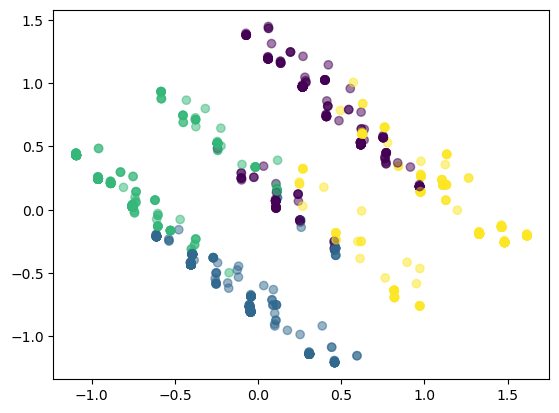

In [35]:
# Plotting KMeans
plt.scatter(MD_pca_result[:, 0], MD_pca_result[:, 1], c=MD_kmeans_labels, cmap='viridis', alpha=0.5)
plt.show()

In [36]:
# Mixture of Distribution (GMM)
gmm = GaussianMixture(n_components=4, n_init=10)  # Create a GMM object
MD_mixture_result = gmm.fit_predict(MD_x)  # Fit the model and predict
print(MD_mixture_result)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

[1 1 0 ... 1 2 1]


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

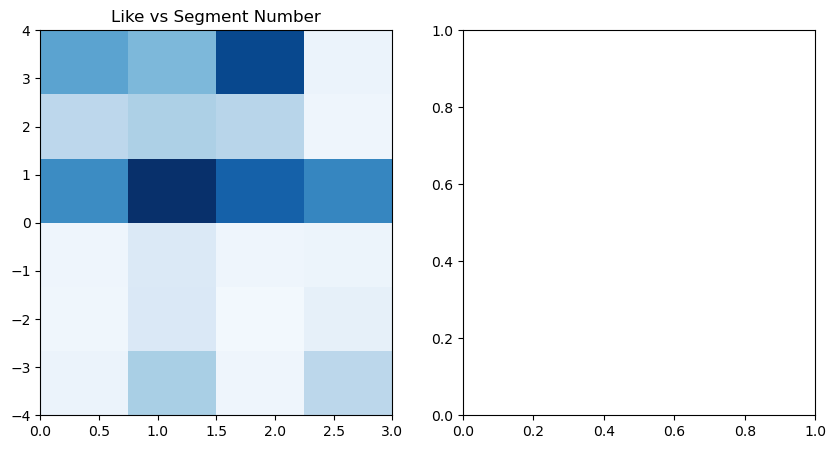

In [40]:
# Describing Segments
k4 = MD_kmeans_labels
gender = mcdonalds['Gender']

# Convert 'Like' column to numeric, handling non-numeric values
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Replace NaN values with a default value, e.g., 0
mcdonalds['Like'].fillna(0, inplace=True)

# Mosaicplot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist2d(k4, mcdonalds['Like'], bins=(4, 6), cmap='Blues', vmin=0)  # Assuming 'Like' is the original column
plt.title('Like vs Segment Number')

plt.subplot(1, 2, 2)
plt.hist2d(k4, gender, bins=(4, 2), cmap='Blues')
plt.title('Gender vs Segment Number')

plt.show()
